# Multi Linear Regression Practice

### Dataset:
- Boston Housing

# 0. Data Import

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import datetime

from sklearn import datasets

In [8]:
import sklearn
print(sklearn.__version__)

1.0.1


In [11]:
pd.read_csv('00 Data Sets/housing.csv')

FileNotFoundError: [Errno 2] No such file or directory: '00 Data Sets/housing.csv'

In [6]:
california = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])
df['MEDV'] = y
df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 1. Exploratory Data Analysis

In [4]:
############## Before Data Preprocessing ##############
print(df.info())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Remarks
- no null values
- range across the numerical features are not equal. [Since linear regression uses gradient descent, it's important for our features to share approximately the same range of values]

### Data Description
- The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:
- crim (per capita crime rate by town)
- zn (proportion of residential land zoned for lots over 25,000 sq.ft.)
- indus (proportion of non-retail business acres per town.)
- chas (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).)
- nox (nitrogen oxides concentration (parts per 10 million).)
- rm (average number of rooms per dwelling.)
- age (proportion of owner-occupied units built prior to 1940.)
- dis (weighted mean of distances to five Boston employment centres.)
- rad (index of accessibility to radial highways.)
- tax (full-value property-tax rate per \$10,000.)
- ptratio (pupil-teacher ratio by town.)
- black (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.)
- lstat (lower status of the population (percent).)
- medv (median value of owner-occupied homes in \$1000s.)

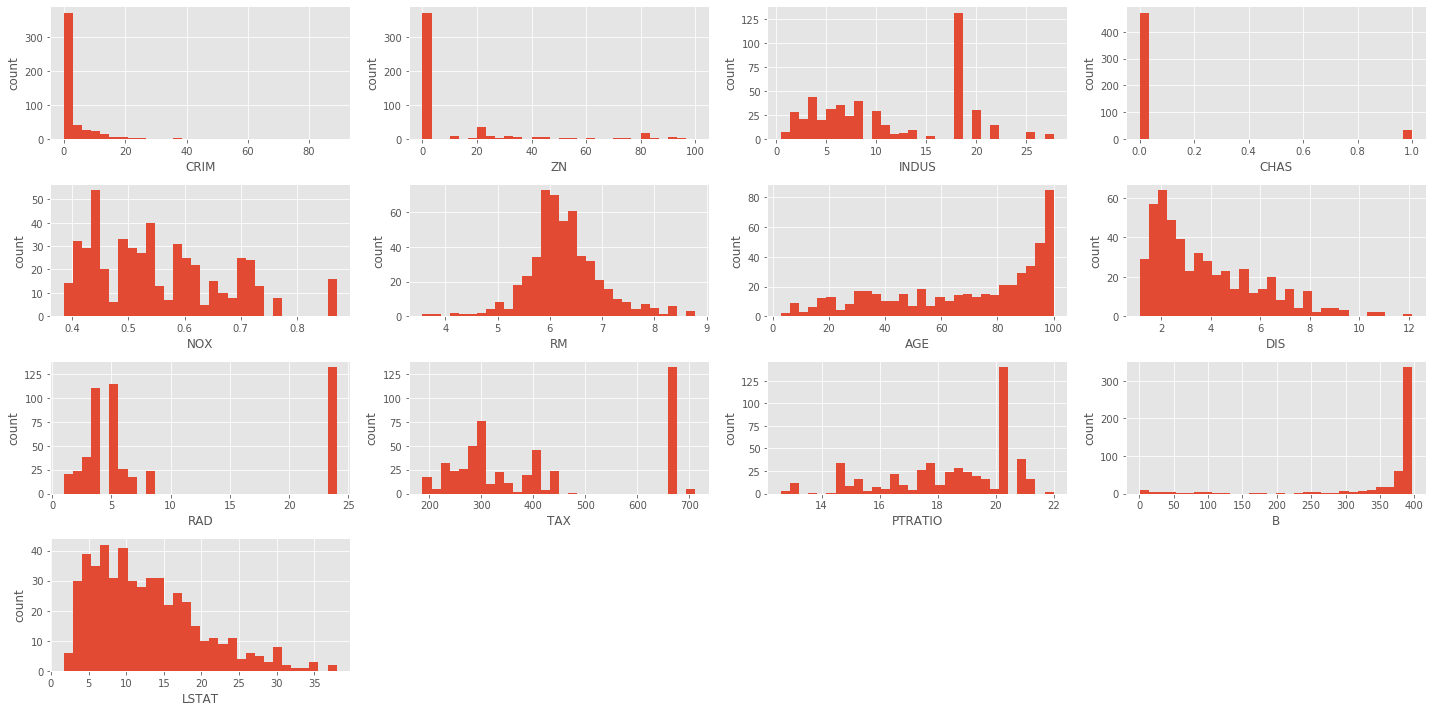

In [5]:
############ Plotting Distribution of Each Continuous Variable ##############
plt.figure(figsize = (20,10)) #sets the size of the overall plot

# creating a loop that would plot distribution
i = 1

for feature in list(boston.feature_names):
    plt.subplot(4,4,i)
    df[feature].plot.hist(bins = 30) #put bins to 30 for clearer depiction of distribution
    plt.xlabel(feature)
    plt.ylabel("count")
    i+=1

plt.tight_layout()
    

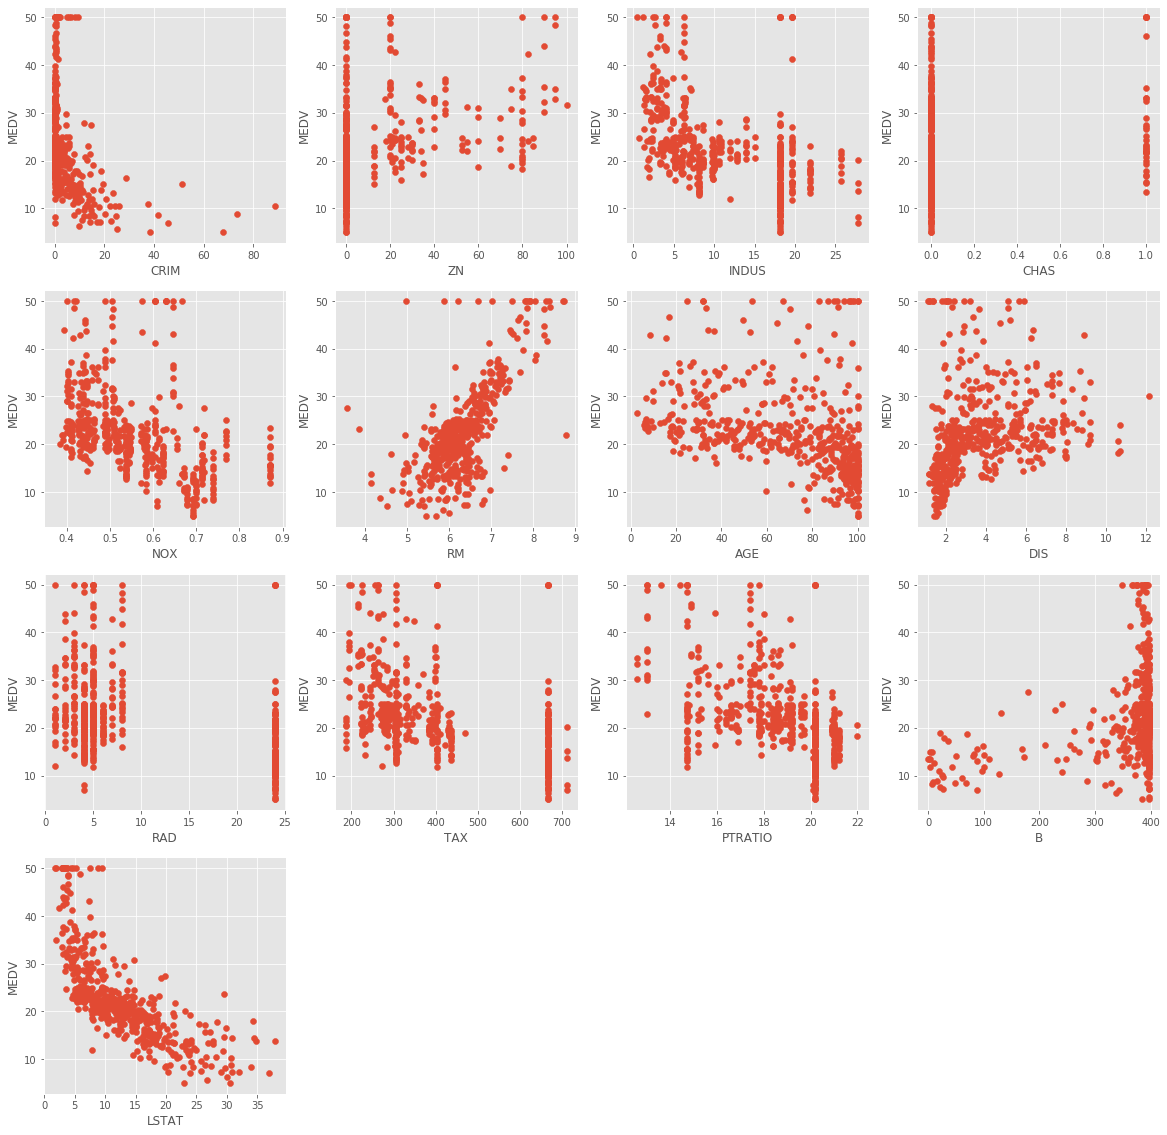

In [6]:
############ Plotting Scatterplot of Each Continuous Variable Against Y ##############

plt.figure(figsize = (20,20))

# creating a loop for plotting
i = 1
for variable in list(boston.feature_names):
    plt.subplot(4,4,i)
    plt.scatter(x = variable, y = 'MEDV', data = df)
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

## 1.1. Data Preprocessing

In [7]:
#################### 1st Round of Data Preprocessing ####################
# Notes: As this is the first round of Data Preprocessing, we keep it very minimal. Reason being
# this first round is just meant to produce a quick model on a dataset that's not manipulated in any form. 

# 1. Removing CHAS for the time being as it is a categorical variable.
df_dropCHAS = df.drop(['CHAS'], axis = 1)
df_dropCHAS

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
print(df_dropCHAS.corr()['MEDV'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


## 1.2 Creating of Train-Test Sets


In [9]:
from sklearn.model_selection import train_test_split

X = df_dropCHAS.drop(['MEDV'], axis = 1)
y = df_dropCHAS['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# 2. Model Training and Evaluation

In [10]:
import statsmodels.api as smf

X_ = X_train
y_ = y_train
X_ = smf.add_constant(X_) # in scikit learn, this is usually auto added. But OLS does not have it
mod = smf.OLS(y_, X_)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     96.30
Date:                Fri, 08 Oct 2021   Prob (F-statistic):          1.06e-108
Time:                        09:42:17   Log-Likelihood:                -1172.8
No. Observations:                 404   AIC:                             2372.
Df Residuals:                     391   BIC:                             2424.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6266      5.453      6.717      0.0

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
res.mse_resid

20.103122233430078

Observations:
1. The data we're using have different ranges.
2. INDUS and AGE are the only 2 features whose T-Test do not refect H0. H0 states that H0 does not have a relationship with Y.
3. Adjusted R^2 is fairly decent (0.739)
4. P(F-Test) is << 0.05, implying that there is indeed a relationship between the data and the Y. 


In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)


0.74719302333942
[-1.32286650e-01  6.32444350e-02  3.72399755e-03 -1.59192036e+01
  3.14994141e+00  1.85964857e-02 -1.48364898e+00  3.18785287e-01
 -1.29429804e-02 -8.48549159e-01  1.18281409e-02 -5.89139345e-01]


In [28]:
np.mean((res.predict(smf.add_constant(X_train)) - y_train)**2)

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


19.456239587304864

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# mean_squared_error(y_train, reg.predict(X_train))
mean_squared_error(y_train, res.predict(smf.add_constant(X_train)))


19.456239587304854

In [33]:
reg.coef_

array([-1.32286650e-01,  6.32444350e-02,  3.72399755e-03, -1.59192036e+01,
        3.14994141e+00,  1.85964857e-02, -1.48364898e+00,  3.18785287e-01,
       -1.29429804e-02, -8.48549159e-01,  1.18281409e-02, -5.89139345e-01])

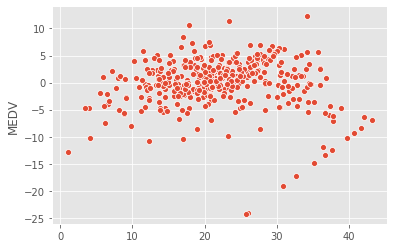

In [38]:
sns.scatterplot(x = reg.predict(X_train), y = reg.predict(X_train)-y_train)

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(reg, X_train, y_train, cv = 5, n_jobs=-1)

array([0.65712042, 0.79594296, 0.76793365, 0.74362476, 0.63060401])

In [42]:
cross_val_score(LinearRegression(), X_train, y_train, cv = 5, n_jobs=-1)

array([0.65712042, 0.79594296, 0.76793365, 0.74362476, 0.63060401])

In [54]:
### short practice (can delete after)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

mod = LinearRegression()
res = mod.fit(X_train, y_train)
y_test_predict = res.predict(X_test)

## Adj. R2 of model
r_sq = res.score(X_train, y_train)
adj_r_sq = 1-(1-r_sq)*(len(X_train)-1)/(len(X_train)-len(X_train.columns)-1)
print('Adjusted R2: ', adj_r_sq)

## Print MSE of model on train data
from sklearn.metrics import f1_score, mean_squared_error
mean_squared_error(y_train, res.predict(X_train))



Adjusted R2:  0.7394342414470236


19.45623958730485

Remarks:
- The above is with the use of SKLearn and Statsmodel and they present the same coefficients and the same R^2. 

# 3. Model Prediction

## 3.1. Evaluating model based on the training set

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


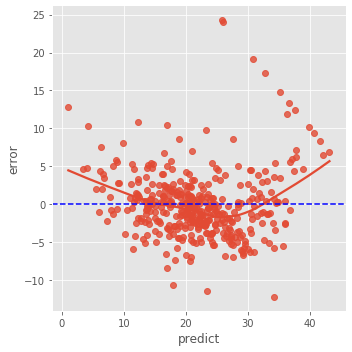

In [331]:
########## Producing Predictions from Trained Model ##########
predict = res.predict(smf.add_constant(X_train))

########## Measuring of Errors ##########
error = y_train - predict

######## Plotting out Predictions and Residuals ########
# We wanna see the residuals and prediction plots well bounced about the y = 0 horizontal line.
df_predict_error = pd.concat([predict,error], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)

sns.lmplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True)
plt.axhline(y = 0, color = 'b', linestyle = '--')

######## Resources on the use of lowess = True #########
# https://www.statisticshowto.com/lowess-smoothing/ 


## 3.2. Evaluating model based on the test set

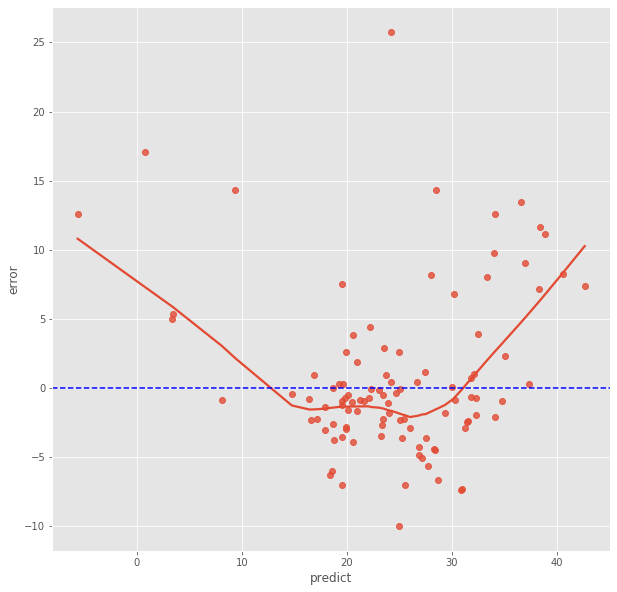

In [332]:
########## Producing Predictions from Trained Model ##########
predict = res.predict(smf.add_constant(X_test))

########## Measuring of Errors ##########
error = y_test - predict

df_predict_error = pd.concat([predict,error], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)


plt.figure(figsize=(10,10))
sns.regplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True)
plt.axhline(y = 0, color = 'b', linestyle = '--')



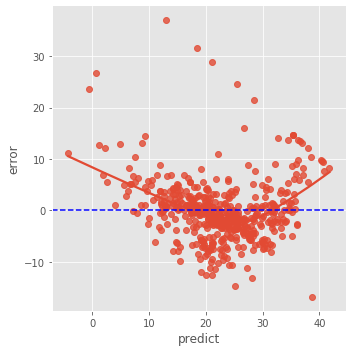

In [333]:
########## Producing Predictions from Trained Model ##########
from sklearn.model_selection import cross_val_predict

reg = LinearRegression()
predict = pd.Series(cross_val_predict(reg, X, y, cv=5))
# predict = res.predict(smf.add_constant(X))

########## Measuring of Errors ##########
error = y - predict

df_predict_error = pd.concat([predict,error], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)

sns.lmplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True)
plt.axhline(y = 0, color = 'b', linestyle = '--')



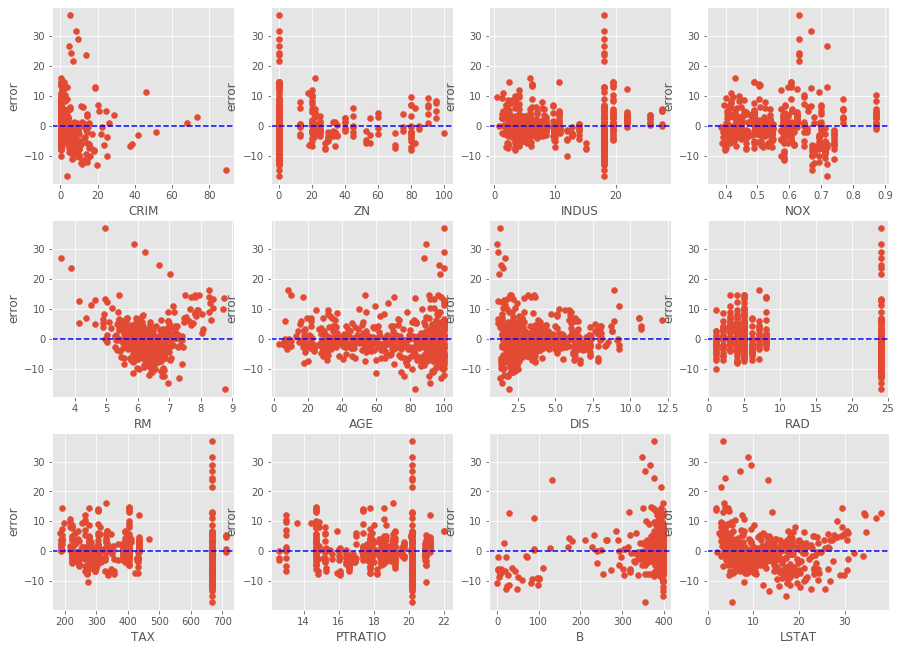

In [334]:
plt.figure(figsize = (15,15))

i = 1

for variable in (X.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = X[variable], y = error)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

## 3.3. Performing cross validation on the data set. 

In [335]:
from sklearn.model_selection import cross_validate

reg = LinearRegression()
cv_results = cross_validate(reg, X, y, cv=5)
sorted(cv_results.keys())

cv_results['test_score']

array([ 0.63306565,  0.73324595,  0.65239421,  0.06415214, -0.37298554])

# 4. Assess our data for outliers, skewed data, collinearity

## 4.1 Plot OG Distribution

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

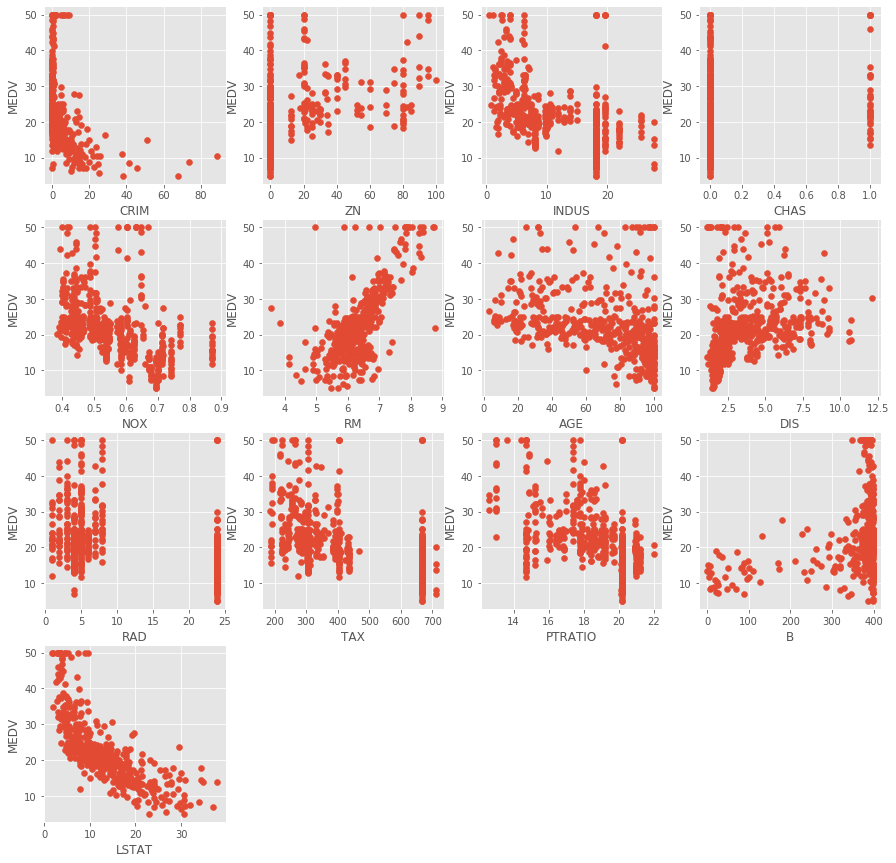

In [336]:
print(df.describe())

############ Plotting Scatterplot of Each Continuous Variable Against Y ##############

plt.figure(figsize = (15,15))

# creating a loop for plotting
i = 1
for variable in list(boston.feature_names):
    plt.subplot(4,4,i)
    plt.scatter(x = variable, y = 'MEDV', data = df)
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

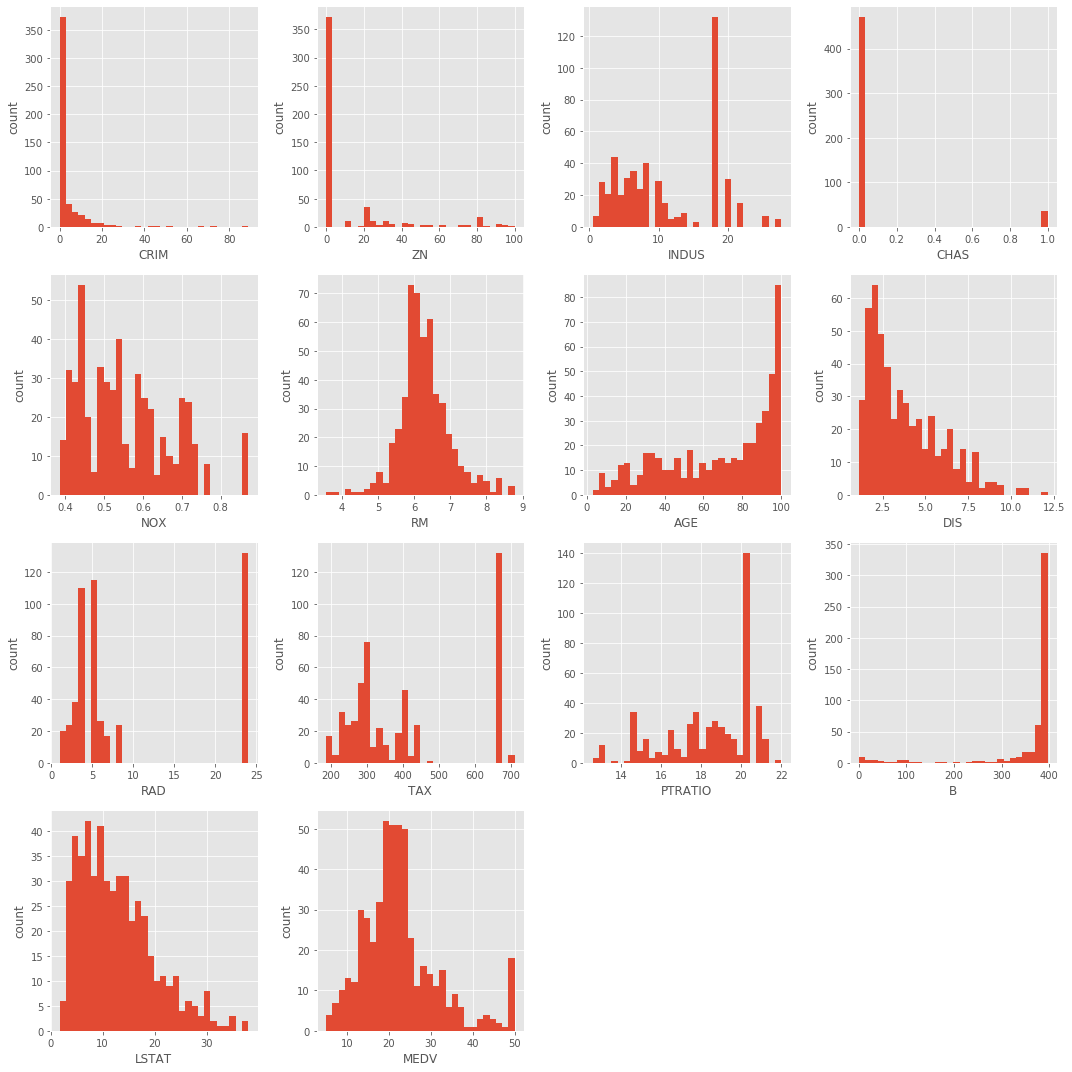

In [337]:
############ Plotting Distribution of Each Continuous Variable ##############
plt.figure(figsize = (15,15)) #sets the size of the overall plot

# creating a loop that would plot distribution
i = 1

for feature in list(df.columns):
    plt.subplot(4,4,i)
    df[feature].plot.hist(bins = 30) #put bins to 30 for clearer depiction of distribution
    plt.xlabel(feature)
    plt.ylabel("count")
    i+=1

plt.tight_layout()
    

In [338]:
#################### 2nd Round of Data Preprocessing ####################
## Perform all the data calculations below this cell block.
## THis will be the central section to collate preprocessing steps

# 1. Removal of Outliers (refer to the above 2 cells)
df_mod = df.drop([368,369,370,371,372]).reset_index(drop = True)

# 2. Removal of TAX and RAD
df_mod.drop(['TAX','RAD'], axis = 1, inplace = True)

df_mod

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,22.4
497,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,20.6
498,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,23.9
499,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,22.0


## 4.2 Finding the outliers in the data

In [339]:
####### Attempts to find the outliers found in the top right corners of RAD and TAX
print(df[(df['RAD']>20) & (df['MEDV']>49)])

print(df[(df['TAX']>600) & (df['MEDV']>49)])

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
368  4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369  5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370  6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371  9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
372  8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
368     20.2  375.52   3.26  50.0  
369     20.2  375.33   3.73  50.0  
370     20.2  392.05   2.96  50.0  
371     20.2  366.15   9.53  50.0  
372     20.2  347.88   8.88  50.0  
        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
368  4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
369  5.66998  0.0   18.1   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
370  6.53876  0.0   18.1   1.0  0.631  7.016   97.5  1.2024  24.0  666.0   
371  9.23230  0.0   18.

## 4.3 Finding the collinear variables

In [121]:
## Creating a copy of X dataframe
X_vif = df_mod.copy()

## Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get variables for which to compute VIF and add intercept term
X_vif = X_vif.drop(['TAX','RAD'], axis = 1)
X_vif['Intercept'] = 1 # Reason to add a constant is found here: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)


## Resources
## - https://github.com/statsmodels/statsmodels/issues/2376

    variables         VIF
0        CRIM    1.506573
1          ZN    2.192180
2       INDUS    3.170092
3        CHAS    1.059424
4         NOX    4.034730
5          RM    2.638096
6         AGE    3.116612
7         DIS    4.360893
8     PTRATIO    1.760300
9           B    1.350218
10      LSTAT    3.521155
11       MEDV    4.581238
12  Intercept  556.447780


#### Observation
- 1st iteration: removed TAX and RAD. Resulted in no variables whose VIF > 5. Stop here.

## 4.3. Data Transformation
### 4.3.1. To produce more linear relationship between Xs and Y.

In [690]:
########### Adding in transformation ###########
## 1. Power Transformation
# features_to_transform = []

# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(standardize = False)
# data = df_mod[features_to_transform]
# pt.fit(data)
# data_transformed = pd.DataFrame(pt.transform(data), columns = [item+'_pt' for item in features_to_transform])
# data_transformed

# df_mod_transform = df_mod.merge(data_transformed, left_index = True, right_index = True, how = 'left')
# df_mod_transform.drop(features_to_transform, axis = 1, inplace = True)

## 2. Logarithm Transformation
features_to_transform = ['CRIM','INDUS','NOX','LSTAT']

data = df_mod[features_to_transform]
data_transformed = np.log(data)
data_transformed.columns = [item+'_log' for item in features_to_transform]
data_transformed

# df_mod_transform = df_mod_transform.merge(data_transformed, left_index = True, right_index = True, how = 'left')
df_mod_transform = df_mod.merge(data_transformed, left_index = True, right_index = True, how = 'left')
df_mod_transform.drop(features_to_transform, axis = 1, inplace = True)

## 3. Negative Exponential Transformation
features_to_transform = ['DIS']

data = df_mod[features_to_transform]
data_transformed = np.exp(-0.5*data)
data_transformed.columns = [item+'_exp' for item in features_to_transform]
data_transformed

# df_mod_transform = df_mod_transform.merge(data_transformed, left_index = True, right_index = True, how = 'left')
df_mod_transform = df_mod_transform.merge(data_transformed, left_index = True, right_index = True, how = 'left')
df_mod_transform.drop(features_to_transform, axis = 1, inplace = True)

## 3. Square Power Transformation
features_to_transform = ['RM','ZN']

data = df_mod[features_to_transform]
data_transformed = data**2
data_transformed.columns = [item+'_sq' for item in features_to_transform]
data_transformed

# df_mod_transform = df_mod_transform.merge(data_transformed, left_index = True, right_index = True, how = 'left')
df_mod_transform = df_mod_transform.merge(data_transformed, left_index = True, right_index = True, how = 'left')
#df_mod_transform.drop(features_to_transform, axis = 1, inplace = True)


In [691]:
df_mod_transform

,ZN,CHAS,RM,AGE,PTRATIO,B,MEDV,CRIM_log,INDUS_log,NOX_log,LSTAT_log,DIS_exp,RM_sq,ZN_sq
0,18.0,0.0,6.575,65.2,15.3,396.90,24.0,-5.064036,0.837248,-0.619897,1.605430,0.129380,43.230625,324.0
1,0.0,0.0,6.421,78.9,17.8,396.90,21.6,-3.600502,1.955860,-0.757153,2.212660,0.083446,41.229241,0.0
2,0.0,0.0,7.185,61.1,17.8,392.83,34.7,-3.601235,1.955860,-0.757153,1.393766,0.083446,51.624225,0.0
3,0.0,0.0,6.998,45.8,18.7,394.63,33.4,-3.430523,0.779325,-0.780886,1.078410,0.048263,48.972004,0.0
4,0.0,0.0,7.147,54.2,18.7,396.90,36.2,-2.672924,0.779325,-0.780886,1.673351,0.048263,51.079609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,6.593,69.1,21.0,391.99,22.4,-2.770511,2.479056,-0.556870,2.269028,0.289587,43.467649,0.0
497,0.0,0.0,6.120,76.7,21.0,396.90,20.6,-3.095111,2.479056,-0.556870,2.206074,0.318622,37.454400,0.0
498,0.0,0.0,6.976,91.0,21.0,396.90,23.9,-2.800824,2.479056,-0.556870,1.729884,0.338324,48.664576,0.0
499,0.0,0.0,6.794,89.3,21.0,393.45,22.0,-2.211009,2.479056,-0.556870,1.868721,0.302870,46.158436,0.0


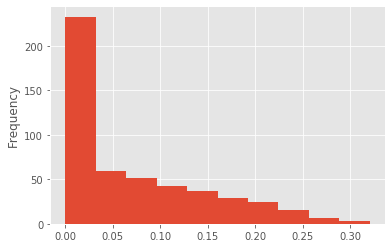

In [650]:
(np.exp(-df_mod['DIS'])).plot.hist()

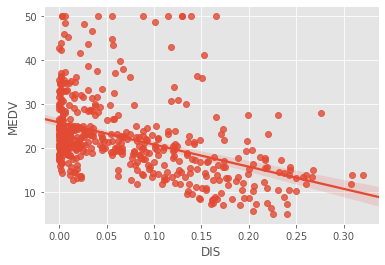

In [651]:
sns.regplot(x = np.exp(-df_mod['DIS']), y = df_mod_transform['MEDV'])

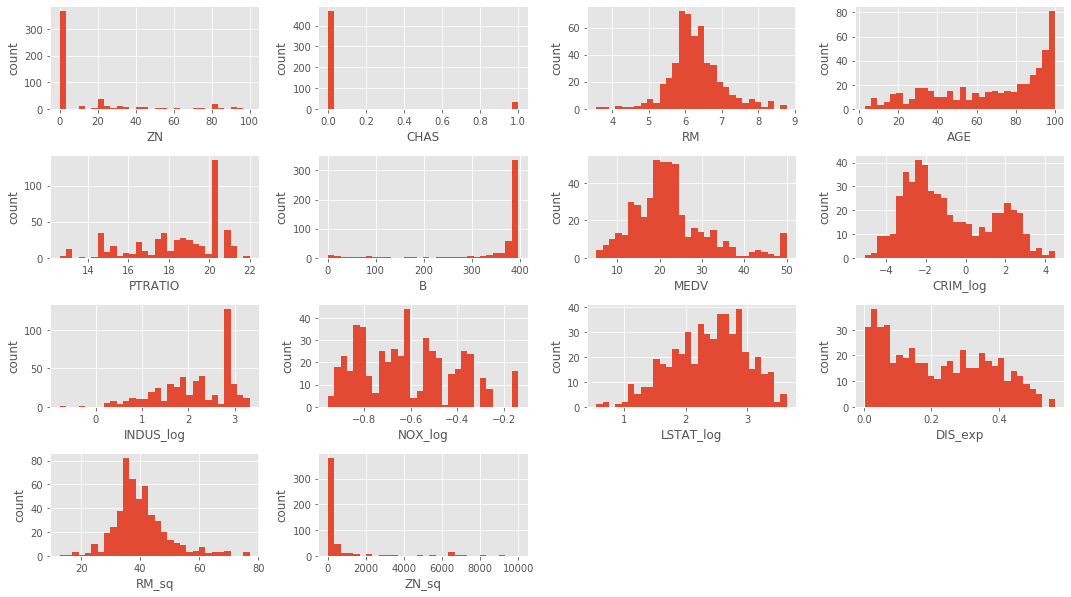

In [652]:
############ Plotting Distribution of Each Continuous Variable ##############
plt.figure(figsize = (15,10)) #sets the size of the overall plot

# creating a loop that would plot distribution
i = 1

for feature in list(df_mod_transform.columns):
    plt.subplot(5,4,i)
    df_mod_transform[feature].plot.hist(bins = 30) #put bins to 30 for clearer depiction of distribution
    plt.xlabel(feature)
    plt.ylabel("count")
    i+=1

plt.tight_layout()
    

/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/bobbycxy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


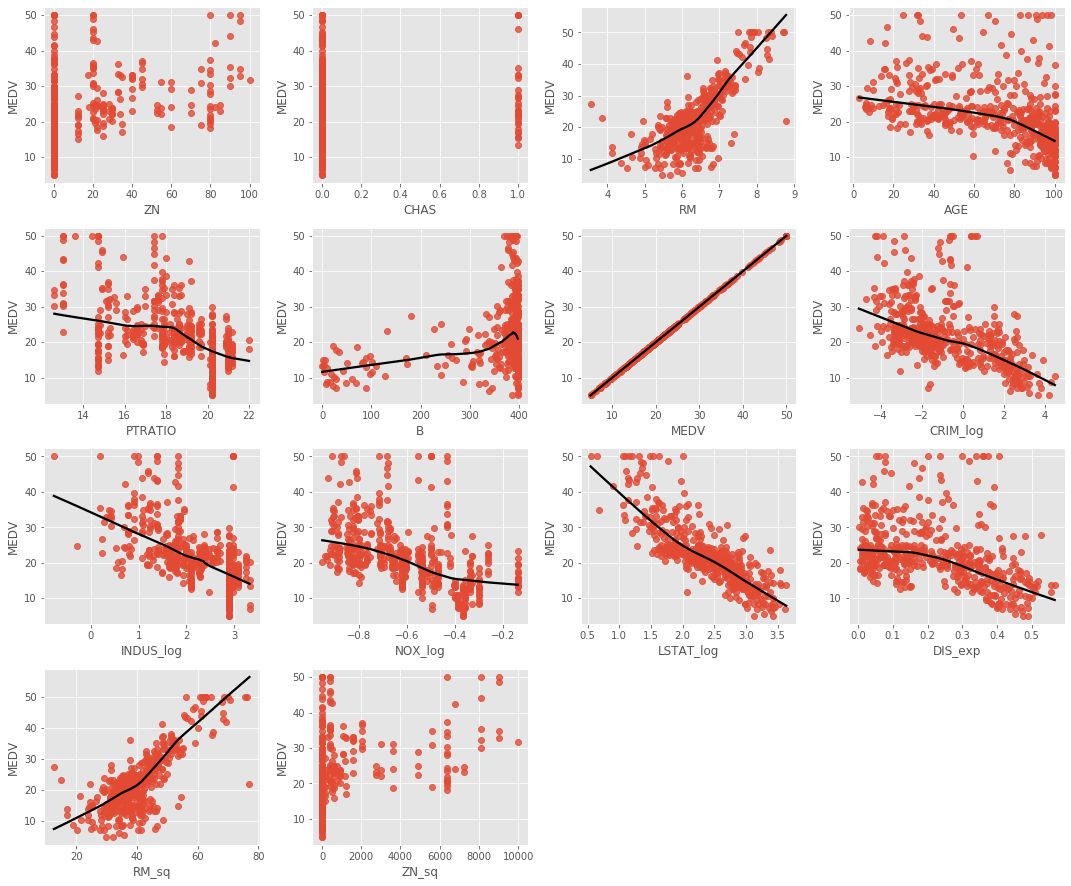

In [653]:
############ Plotting Scatterplot of Each Continuous Variable Against Y ##############

plt.figure(figsize = (15,15))

# creating a loop for plotting
i = 1
for variable in list(df_mod_transform.columns):
    plt.subplot(5,4,i)
    sns.regplot(x = variable, y = 'MEDV', data = df_mod_transform, lowess = True, line_kws={"color": "black"})
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

plt.tight_layout()

- CHAS and ZN_pt seem to be quite off. Can include them, but okay not to include them.

### 4.3.2. Standardisation

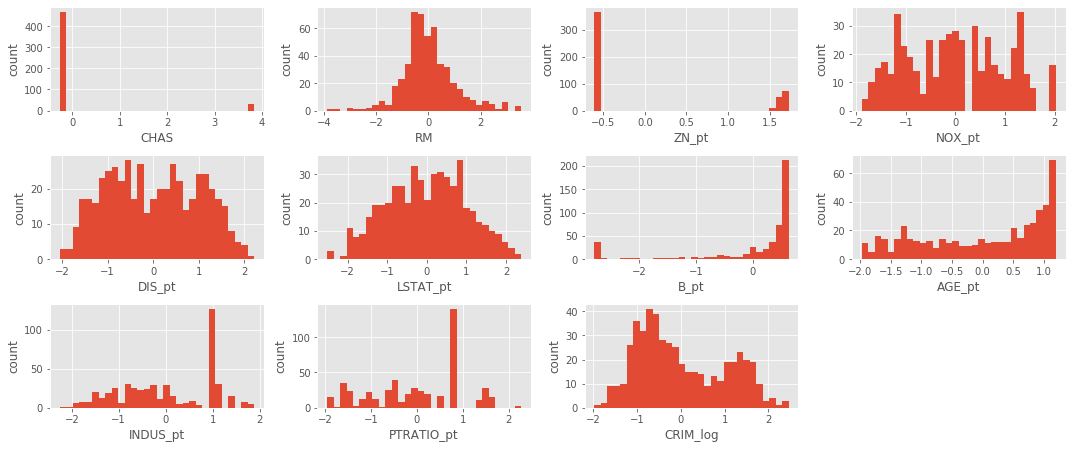

In [276]:
X = df_mod_transform.drop(['MEDV'], axis = 1)

from sklearn.preprocessing import StandardScaler

st = StandardScaler()
df_mod_transform_st = st.fit_transform(X)
df_mod_transform_st = pd.DataFrame(X_scaled, columns = X.columns)

########### Plotting Distribution of Each Continuous Variable ##############
plt.figure(figsize = (15,10)) #sets the size of the overall plot

# creating a loop that would plot distribution
i = 1

for feature in list(df_mod_transform_st.columns):
    plt.subplot(5,4,i)
    df_mod_transform_st[feature].plot.hist(bins = 30) #put bins to 30 for clearer depiction of distribution
    plt.xlabel(feature)
    plt.ylabel("count")
    i+=1

plt.tight_layout()

    

In [692]:
## Creating a copy of X dataframe
# X_vif = df_mod_transform_st#.copy()
X_vif = df_mod_transform.copy()

## Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get variables for which to compute VIF and add intercept term
X_vif = X_vif.drop(['MEDV','NOX_log','RM_sq','ZN_sq'], axis = 1)
X_vif['Intercept'] = 1 # Reason to add a constant is found here: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)


## Resources
## - https://github.com/statsmodels/statsmodels/issues/2376

    variables         VIF
0          ZN    1.974418
1        CHAS    1.065342
2          RM    2.200702
3         AGE    3.314567
4     PTRATIO    1.462683
5           B    1.353636
6    CRIM_log    3.457400
7   INDUS_log    3.455971
8   LSTAT_log    3.733941
9     DIS_exp    3.753921
10  Intercept  518.322490


In [655]:
# temp_df = df_mod.drop(['RAD','TAX','CHAS'], axis = 1)
# temp_df = df_mod.drop(['ZN','CHAS','ZN_dummy'], axis = 1)
df_mod_transform = df_mod_transform.drop(['NOX_log'], axis = 1)
df_mod_transform

,ZN,CHAS,RM,AGE,PTRATIO,B,MEDV,CRIM_log,INDUS_log,LSTAT_log,DIS_exp,RM_sq,ZN_sq
0,18.0,0.0,6.575,65.2,15.3,396.90,24.0,-5.064036,0.837248,1.605430,0.129380,43.230625,324.0
1,0.0,0.0,6.421,78.9,17.8,396.90,21.6,-3.600502,1.955860,2.212660,0.083446,41.229241,0.0
2,0.0,0.0,7.185,61.1,17.8,392.83,34.7,-3.601235,1.955860,1.393766,0.083446,51.624225,0.0
3,0.0,0.0,6.998,45.8,18.7,394.63,33.4,-3.430523,0.779325,1.078410,0.048263,48.972004,0.0
4,0.0,0.0,7.147,54.2,18.7,396.90,36.2,-2.672924,0.779325,1.673351,0.048263,51.079609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,6.593,69.1,21.0,391.99,22.4,-2.770511,2.479056,2.269028,0.289587,43.467649,0.0
497,0.0,0.0,6.120,76.7,21.0,396.90,20.6,-3.095111,2.479056,2.206074,0.318622,37.454400,0.0
498,0.0,0.0,6.976,91.0,21.0,396.90,23.9,-2.800824,2.479056,1.729884,0.338324,48.664576,0.0
499,0.0,0.0,6.794,89.3,21.0,393.45,22.0,-2.211009,2.479056,1.868721,0.302870,46.158436,0.0


# 5. Model Training and Evaluation
## 5.1. Training and Error Plots
Notes:
- I've used '.sample(*n*, random_state = *r*)' and I realised that the rows of the .sample() are reordered. The original indexes of the rows follow the reordered rows. 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          6.14e-155
Time:                        22:39:20   Log-Likelihood:                -1062.5
No. Observations:                 400   AIC:                             2143.
Df Residuals:                     391   BIC:                             2179.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.0348      7.672     14.342      0.0

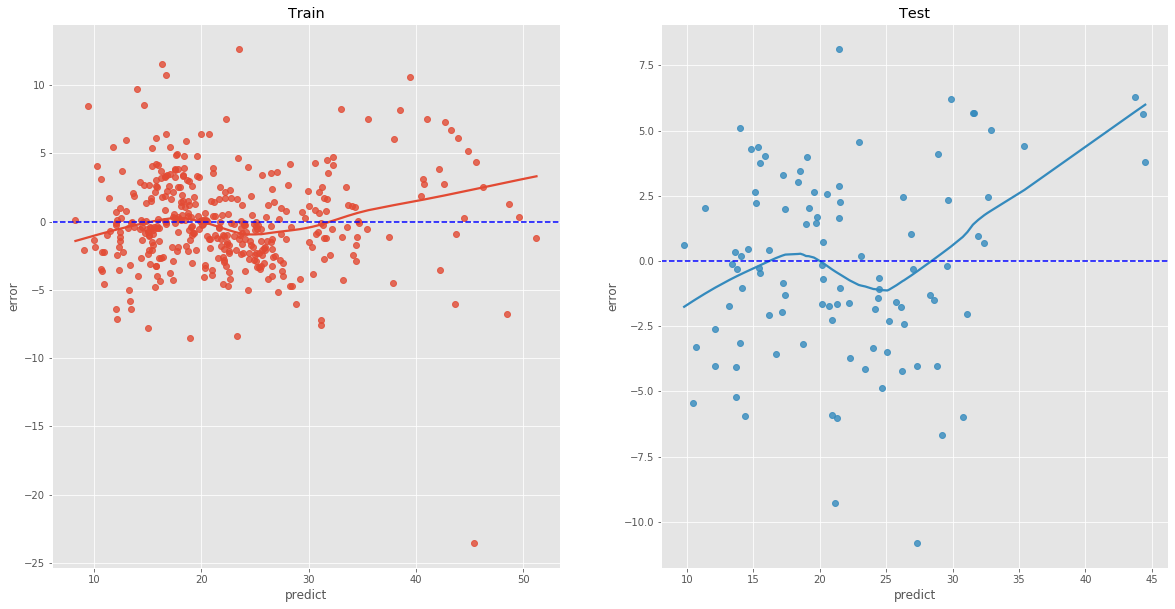

<Figure size 432x288 with 0 Axes>

In [693]:
############################################ PIPELINE ############################################
from sklearn.model_selection import train_test_split

# X_ = df_mod_transform_st_1_2.drop(['B_pt_x','ZN_pt_x','PTRATIO_pt_y','AGE_pt_y','CRIM_log_x','ZN_pt_y','DIS_pt_x','AGE_pt_x','CHAS_x','CHAS_y'], axis = 1)
# y_ = df_mod_transform['MEDV']
# df_mod_transform.drop([364], inplace = True)
data = df_mod_transform.drop(['DIS_exp','AGE','INDUS_log','ZN_sq','CHAS'], axis = 1).sample(len(df_mod_transform), random_state = 10)
X_ = data.drop(['MEDV'], axis = 1)
y_ = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = 10)

########## Training Model ##########
import statsmodels.api as smf


mod = smf.OLS(y_train, smf.add_constant(X_train))
res = mod.fit()
print(res.summary())

########## Producing Predictions from Trained Model ##########
predict = res.predict(smf.add_constant(X_train))

########## Measuring of Errors ##########
error_train = y_train - predict
error = error_train


########
fig, axes = plt.subplots(1,2, figsize = (20,10))


######## Plotting out Predictions and Residuals ########
# We wanna see the residuals and prediction plots well bounced about the y = 0 horizontal line.
df_predict_error = pd.concat([predict,error], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)

sns.regplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True, ax = axes[0])
axes[0].axhline(y = 0, color = 'b', linestyle = '--')
axes[0].set_title('Train')

######## Resources on the use of lowess = True #########
# https://www.statisticshowto.com/lowess-smoothing/ 

########## Producing Predictions from Test Model ##########
predict = res.predict(smf.add_constant(X_test))

########## Measuring of Errors ##########
error_test = y_test - predict
error = error_test

df_predict_error = pd.concat([predict,error], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)

sns.regplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True, ax = axes[1])
axes[1].axhline(y = 0, color = 'b', linestyle = '--')
axes[1].set_title('Test')

plt.show()
plt.tight_layout()

In [696]:
res.mse_resid

12.15316748688986

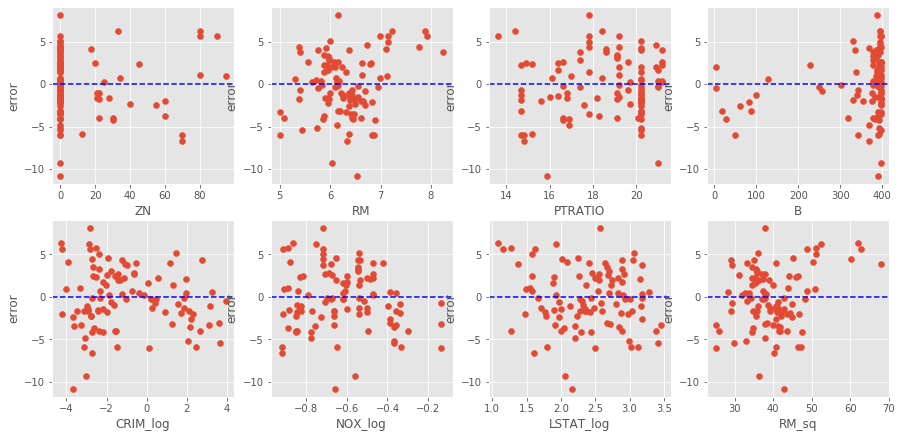

In [697]:
plt.figure(figsize = (15,15))

i = 1

for variable in (X_test.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = X_test[variable], y = error_test)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

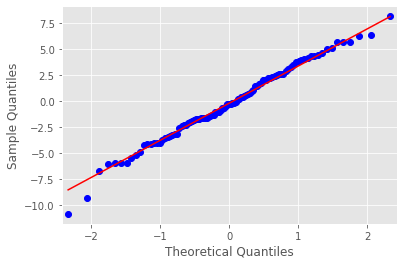

In [698]:
from statsmodels.graphics.gofplots import qqplot

qqplot(error_test, line='s')
plt.show()

In [699]:
# importing Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(error_test)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.991, p=0.747
Sample looks Gaussian (fail to reject H0)


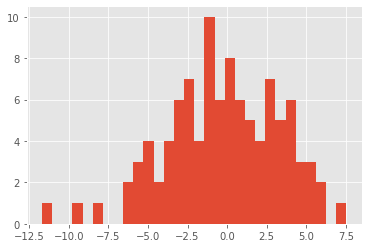

In [663]:
error.hist(bins = 30)

In [665]:
min(error_test)

-11.693739758553647

In [591]:
error_train.sort_values()

342   -11.071491
500   -10.063815
370    -8.824342
375    -8.244275
232    -8.139846
         ...    
214     8.490240
186     8.537133
404    11.186693
402    12.216776
181    12.305374
Length: 400, dtype: float64

In [499]:
error_train.loc[364]

-25.83714357608968

In [502]:
df_mod_transform.loc[364]

ZN             0.000000
CHAS           1.000000
RM             8.780000
AGE           82.900000
PTRATIO       20.200000
B            354.550000
MEDV          21.900000
CRIM_log       1.245387
INDUS_log      2.895912
LSTAT_log      1.665818
DIS_exp        0.385833
RM_sq         77.088400
ZN_sq          0.000000
Name: 364, dtype: float64

In [507]:
res.predict(smf.add_constant(X_train)).loc[364]

47.73714357608968

In [603]:
res.resid

305    4.332986
107    1.785598
350   -1.813172
334   -4.269552
142   -4.960713
         ...   
320   -0.611678
15    -0.057671
485   -5.256166
125    3.005403
265    0.430496
Length: 400, dtype: float64

In [605]:
y_train - predict_train

0     -6.131686
1           NaN
2     -0.107857
3     -1.241269
4      4.165007
         ...   
495         NaN
497    0.007914
498         NaN
499         NaN
500   -9.179992
Length: 482, dtype: float64

In [528]:
error_train

305    4.332986
107    1.785598
350   -1.813172
334   -4.269552
142   -4.960713
         ...   
320   -0.611678
15    -0.057671
485   -5.256166
125    3.005403
265    0.430496
Length: 400, dtype: float64

In [524]:
sum(error_train**2)/len(error_train)

10.16000197596743

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.16e-150
Time:                        21:40:00   Log-Likelihood:                -1061.3
No. Observations:                 400   AIC:                             2149.
Df Residuals:                     387   BIC:                             2201.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.3836      7.989     13.942      0.0

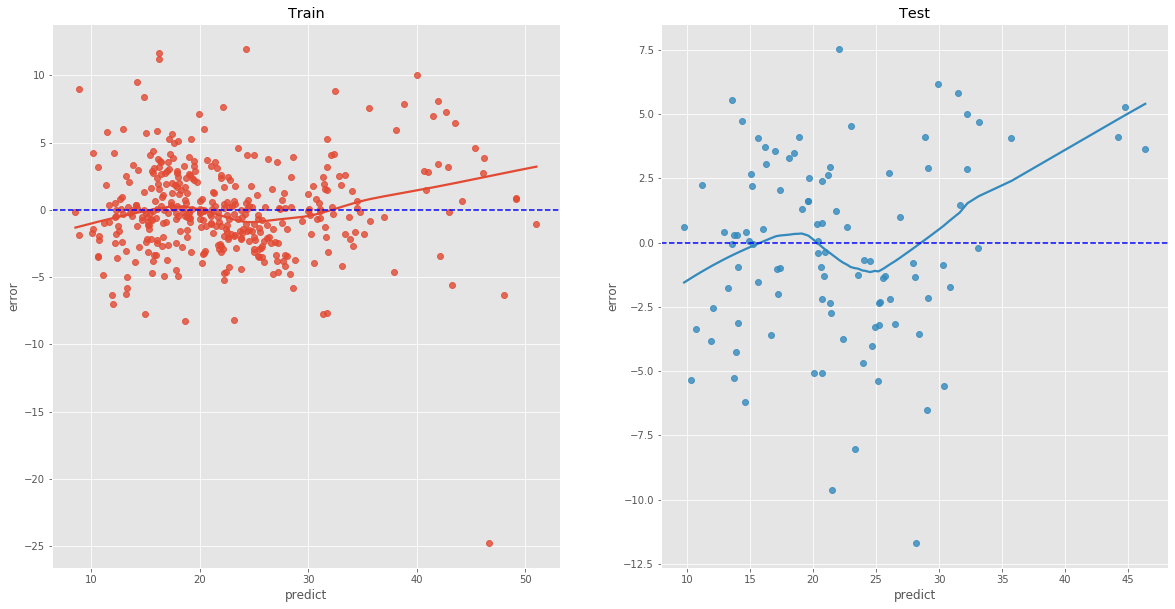

<Figure size 432x288 with 0 Axes>

In [679]:
############################################ PIPELINE ############################################
from sklearn.model_selection import train_test_split

#df_mod_transform.drop([364], inplace = True)

# training_sizes = np.round(np.linspace(1, len(df_mod_transform), 5)).astype(int)[1:]
training_sizes = [10, 20, 50, 80, 120, 280, 322, 450, 501]
train_cost = []
test_cost = []

random_state = 10

for i in training_sizes:
    
    data = df_mod_transform.sample(i, random_state = random_state)
    
    X_ = data.drop(['MEDV'], axis = 1)
    y_ = data['MEDV']

    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state = random_state)

    ########## Training Model ##########
    import statsmodels.api as smf

    mod = smf.OLS(y_train, smf.add_constant(X_train))
    res = mod.fit()

    ########## Producing Predictions, Errors and MSE from Trained Model ##########
    predict_train = res.predict(smf.add_constant(X_train))
    
    error_train = res.resid
    
    mse_train = np.mean(res.resid**2)
    train_cost.append(mse_train)
    
    ########## Producing Predictions, Errors and MSE from Trained Model ##########
    predict_test = res.predict(smf.add_constant(X_test))
    
    error_test = y_test - predict_test
    
    mse_test = np.mean(error_test**2)
    test_cost.append(mse_test)


######## PRINTING Results ########
print(res.summary())


######## Plotting out Predictions and Residuals ########
# We wanna see the residuals and prediction plots well bounced about the y = 0 horizontal line.
fig, axes = plt.subplots(1,2, figsize = (20,10))


### A. TRAINING DATA ###
df_predict_error = pd.concat([predict_train,error_train], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)

sns.regplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True, ax = axes[0])
axes[0].axhline(y = 0, color = 'b', linestyle = '--')
axes[0].set_title('Train')

### B. TEST DATA ###
df_predict_error = pd.concat([predict_test,error_test], axis = 1)
df_predict_error.columns = ['predict','error']
df_predict_error.reset_index(drop = True, inplace = True)

sns.regplot(data = df_predict_error, x = 'predict', y = 'error', lowess = True, ax = axes[1])
axes[1].axhline(y = 0, color = 'b', linestyle = '--')
axes[1].set_title('Test')

plt.show()
plt.tight_layout()

######## Resources on the use of lowess = True #########
# https://www.statisticshowto.com/lowess-smoothing/ 

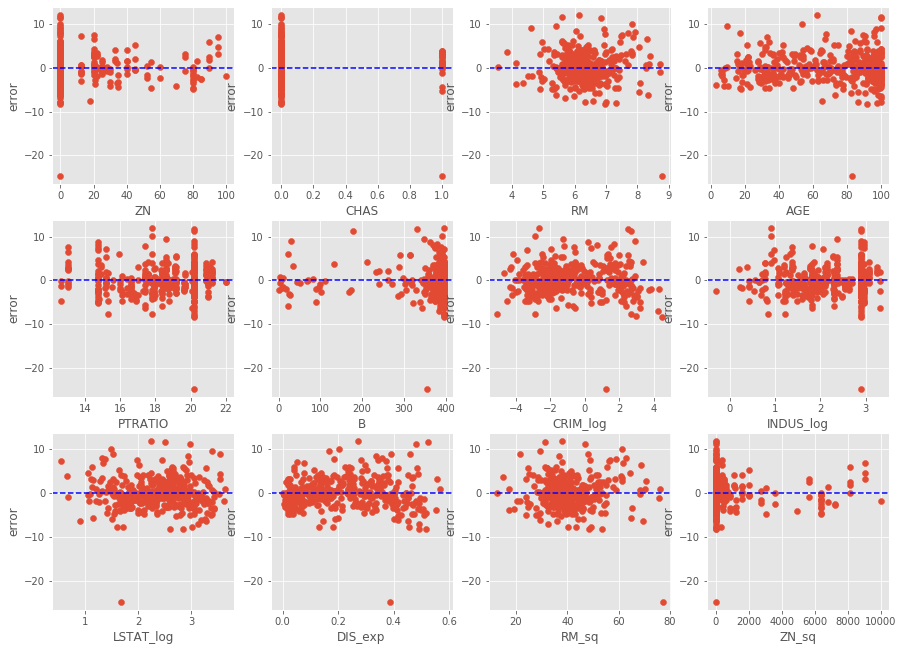

In [668]:
plt.figure(figsize = (15,15))

i = 1

for variable in (X_train.columns):
    plt.subplot(4,4,i)
    plt.scatter(x = X_train[variable], y = error_train)
    plt.axhline(y = 0, color = 'b', linestyle = '--')
    plt.xlabel(variable)
    plt.ylabel('error')
    i += 1

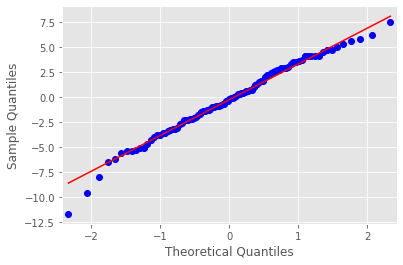

In [671]:
from statsmodels.graphics.gofplots import qqplot

qqplot(error_test, line='s')
plt.show()

In [673]:
# importing Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(error_test)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.986, p=0.389
Sample looks Gaussian (fail to reject H0)


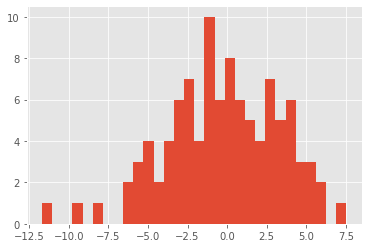

In [675]:
error_test.hist(bins = 30)

(0, 40)

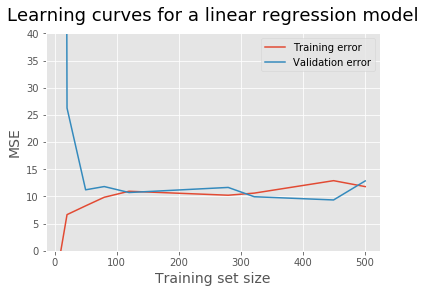

In [680]:
plt.plot(training_sizes, train_cost, label = 'Training error')
plt.plot(training_sizes, test_cost, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [572]:
res.predict(smf.add_constant(X_test))

405    16.170279
230    21.617780
132    18.731823
167    21.495482
109    17.680161
         ...    
418    11.572081
50     20.746549
303    31.760126
500    21.180759
480    19.306778
Length: 101, dtype: float64

# ARCHIVE

In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(df_mod[df_mod['ZN_dummy'] == 1]['MEDV'], df_mod[df_mod['ZN_dummy'] == 0]['MEDV'])
print(p_value)

# f_stat, p_value = f_oneway(df_mod[df_mod['TAX_dummy'] == 1]['MEDV'], df_mod[df_mod['TAX_dummy'] == 0]['MEDV'])
# print(p_value)

# f_stat, p_value = f_oneway(df_mod[df_mod['CHAS'] == 1]['MEDV'], df_mod[df_mod['CHAS'] == 0]['MEDV'])
# print(p_value)

In [284]:
df_mod_transform_st_2 = df_mod_transform_st**2
df_mod_transform_st_2

,CHAS,RM,ZN_pt,DIS_pt,LSTAT_pt,B_pt,AGE_pt,INDUS_pt,PTRATIO_pt,CRIM_log
0,0.06823,0.169658,2.534832,0.188464,1.626441,0.394439,0.039358,2.312324,1.963008,3.906533
1,0.06823,0.037033,0.364829,0.624332,0.121428,0.394439,0.107360,0.183943,0.255085,1.682082
2,0.06823,1.641396,0.364829,0.624332,2.442516,0.248504,0.121716,0.183943,0.255085,1.682964
3,0.06823,1.029591,0.364829,1.298881,3.825547,0.308403,0.772328,2.439602,0.004011,1.483589
4,0.06823,1.505574,0.364829,1.298881,1.390250,0.394439,0.353204,2.439602,0.004011,0.750407
...,...,...,...,...,...,...,...,...,...,...
496,0.06823,0.191447,0.364829,0.285044,0.065009,0.222993,0.002723,0.094757,2.048313,0.830962
497,0.06823,0.055931,0.364829,0.480020,0.129102,0.394439,0.058028,0.094757,2.048313,1.128457
498,0.06823,0.966951,0.364829,0.639595,1.204595,0.394439,0.671582,0.094757,2.048313,0.856821
499,0.06823,0.524146,0.364829,0.368280,0.795167,0.268323,0.560931,0.094757,2.048313,0.424824


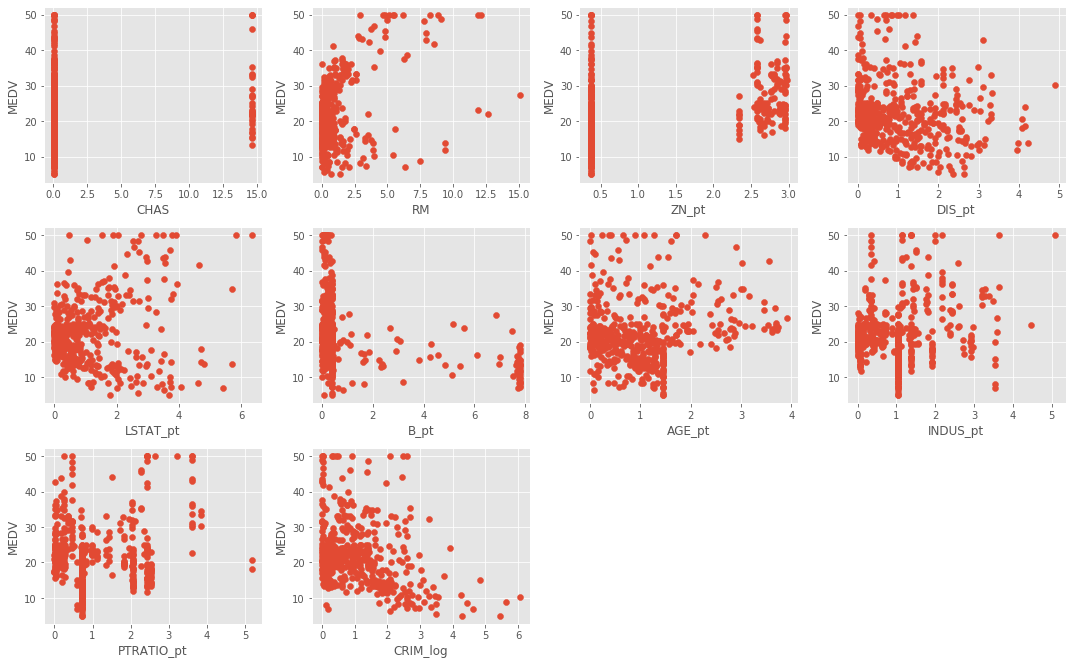

In [318]:
############ Plotting Scatterplot of Each Continuous Variable Against Y ##############

plt.figure(figsize = (15,15))

# creating a loop for plotting
i = 1
for variable in list(df_mod_transform_st_2.columns):
    plt.subplot(5,4,i)
    plt.scatter(x = df_mod_transform_st_2[variable], y = df_mod_transform['MEDV'])
    plt.xlabel(variable)
    plt.ylabel('MEDV')
    i += 1

plt.tight_layout()

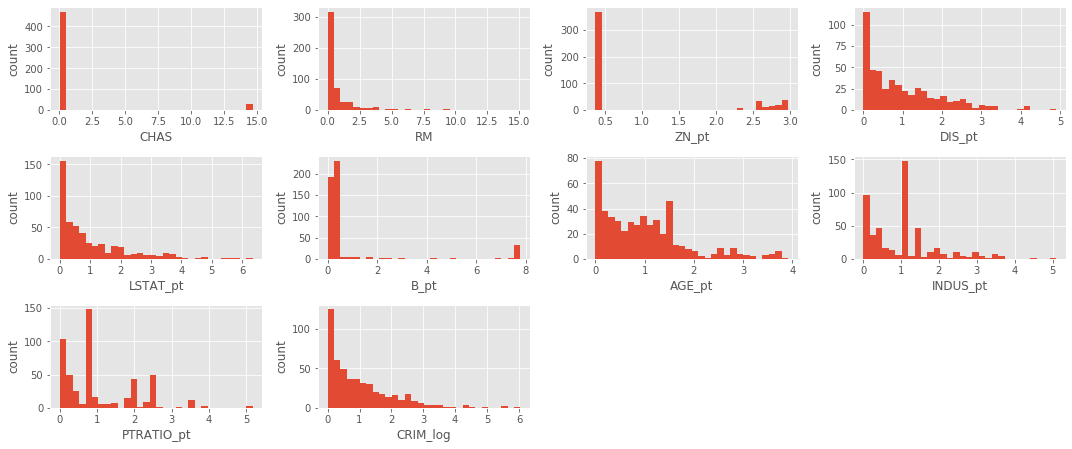

In [317]:
############ Plotting Distribution of Each Continuous Variable ##############
plt.figure(figsize = (15,10)) #sets the size of the overall plot

# creating a loop that would plot distribution
i = 1

for feature in list(df_mod_transform_st_2.columns):
    plt.subplot(5,4,i)
    df_mod_transform_st_2[feature].plot.hist(bins = 30) #put bins to 30 for clearer depiction of distribution
    plt.xlabel(feature)
    plt.ylabel("count")
    i+=1

plt.tight_layout()

In [286]:
df_mod_transform_st_1_2 = df_mod_transform_st.merge(df_mod_transform_st_2, left_index = True, right_index = True, how = 'left')
df_mod_transform_st_1_2

,CHAS_x,RM_x,ZN_pt_x,DIS_pt_x,LSTAT_pt_x,B_pt_x,AGE_pt_x,INDUS_pt_x,PTRATIO_pt_x,CRIM_log_x,CHAS_y,RM_y,ZN_pt_y,DIS_pt_y,LSTAT_pt_y,B_pt_y,AGE_pt_y,INDUS_pt_y,PTRATIO_pt_y,CRIM_log_y
0,-0.261209,0.411896,1.592116,0.434125,-1.275320,0.628044,-0.198389,-1.520633,-1.401074,-1.976495,0.06823,0.169658,2.534832,0.188464,1.626441,0.394439,0.039358,2.312324,1.963008,3.906533
1,-0.261209,0.192440,-0.604011,0.790147,-0.348465,0.628044,0.327658,-0.428885,-0.505059,-1.296951,0.06823,0.037033,0.364829,0.624332,0.121428,0.394439,0.107360,0.183943,0.255085,1.682082
2,-0.261209,1.281170,-0.604011,0.790147,-1.562855,0.498502,-0.348878,-0.428885,-0.505059,-1.297291,0.06823,1.641396,0.364829,0.624332,2.442516,0.248504,0.121716,0.183943,0.255085,1.682964
3,-0.261209,1.014688,-0.604011,1.139685,-1.955901,0.555340,-0.878822,-1.561922,-0.063334,-1.218027,0.06823,1.029591,0.364829,1.298881,3.825547,0.308403,0.772328,2.439602,0.004011,1.483589
4,-0.261209,1.227018,-0.604011,1.139685,-1.179088,0.628044,-0.594310,-1.561922,-0.063334,-0.866260,0.06823,1.505574,0.364829,1.298881,1.390250,0.394439,0.353204,2.439602,0.004011,0.750407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.261209,0.437547,-0.604011,-0.533895,-0.254968,0.472221,-0.052183,0.307827,1.431193,-0.911571,0.06823,0.191447,0.364829,0.285044,0.065009,0.222993,0.002723,0.094757,2.048313,0.830962
497,-0.261209,-0.236497,-0.604011,-0.692835,-0.359308,0.628044,0.240889,0.307827,1.431193,-1.062289,0.06823,0.055931,0.364829,0.480020,0.129102,0.394439,0.058028,0.094757,2.048313,1.128457
498,-0.261209,0.983337,-0.604011,-0.799747,-1.097540,0.628044,0.819501,0.307827,1.431193,-0.925646,0.06823,0.966951,0.364829,0.639595,1.204595,0.394439,0.671582,0.094757,2.048313,0.856821
499,-0.261209,0.723980,-0.604011,-0.606861,-0.891721,0.517999,0.748953,0.307827,1.431193,-0.651785,0.06823,0.524146,0.364829,0.368280,0.795167,0.268323,0.560931,0.094757,2.048313,0.424824


In [312]:
## Creating a copy of X dataframe
X_vif = df_mod_transform_st_1_2.copy()

## Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Get variables for which to compute VIF and add intercept term
X_vif = X_vif.drop(['B_pt_x','ZN_pt_x','PTRATIO_pt_y','AGE_pt_y','CRIM_log_x','ZN_pt_y','DIS_pt_x','AGE_pt_x','CHAS_x','CHAS_y'], axis = 1)
X_vif['Intercept'] = 1 # Reason to add a constant is found here: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python

## Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

## View results using print
print(vif)


## Resources
## - https://github.com/statsmodels/statsmodels/issues/2376

       variables       VIF
0           RM_x  2.049413
1     LSTAT_pt_x  2.846977
2     INDUS_pt_x  1.932635
3   PTRATIO_pt_x  1.420046
4           RM_y  1.302795
5       DIS_pt_y  1.530331
6     LSTAT_pt_y  1.421738
7         B_pt_y  1.330212
8     INDUS_pt_y  1.309521
9     CRIM_log_y  1.566164
10     Intercept  3.336916
